In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from init import readFile, split_dataset, error, reduce, CLASSES, FEATURES, plot_confusion_matrix
from k_nearest_neighbours import KNearestNeighbours, Algo

c:\Users\Maax0\OneDrive - De Vinci\ESILV\A3S2\IA et data\TD3\k_nearest_neighbours.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  class_choice[y_train[i]] += 1/distance[i]


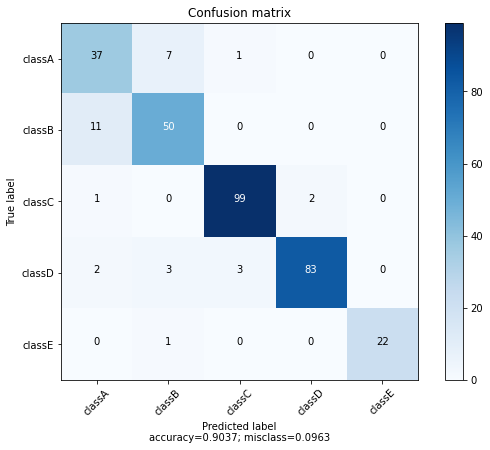

In [61]:
CLASSES = ["classA", "classB", "classC", "classD", "classE"]
# x_train, y_train = readFile('data/data.csv', CLASSES)

data, output = readFile('data/preTest.csv', CLASSES)
data1, output1 = readFile('data/data.csv', CLASSES)
data = np.vstack((data, data1))
output = np.append(output, output1)

x_train, y_train, x_test, y_test = split_dataset(data, output, test_size=.2)

knn = KNearestNeighbours.fit(x_train, y_train, 6, algo = Algo.KD_TREE, leaf_size = 25)
# print(knn.tree)
x_test_predict = knn.predict(x_test)
cf_mat = confusion_matrix(y_test, np.array(list(map(int, x_test_predict))))
plot_confusion_matrix(cf_mat, CLASSES)

In [3]:
leaf_size = 40
k_values = np.arange(1, leaf_size, 1, int)
errors = np.zeros(len(k_values))
for i in range(len(k_values)):
    knn = KNearestNeighbours.fit(x_train, y_train, k_values[i], algo=Algo.BRUTE, leaf_size=leaf_size)
    y_pred = knn.predict(x_test)
    errors[i] += error(y_test, y_pred)

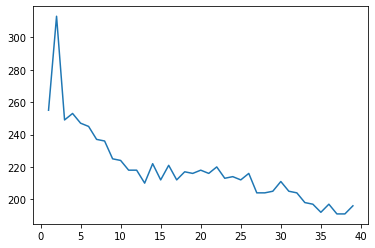

In [4]:
plt.plot(k_values, errors)

In [9]:
leaf_max_size = 40
error_mat = np.zeros((40, 40))
for leaf_size in range(2, leaf_max_size):
    for k in range(1, leaf_size):
        for _ in range(50):
            x_train, y_train, x_test, y_test = split_dataset(data, output, test_size=.5)
            knn = KNearestNeighbours.fit(x_train, y_train, k, algo=Algo.KD_TREE, leaf_size=leaf_size)
            y_pred = knn.predict(x_test)
            error_mat[leaf_size, k] = error(y_test, y_pred)

c:\Users\Maax0\OneDrive - De Vinci\ESILV\A3S2\IA et data\TD3\k_nearest_neighbours.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  class_choice[y_train[i]] += 1/distance[i]


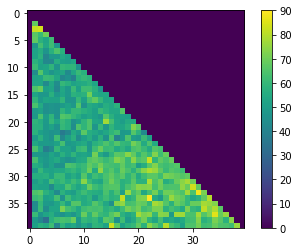

In [10]:
from matplotlib.pyplot import imshow, colorbar

imshow(error_mat)
colorbar()

In [11]:
np.argmin(error_mat)

0